# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller



...planning...
Found plan at elapsed time: 29.459229 s
Tree size: 49
ETA: 512.45 s
lqr success rate: 5.98%


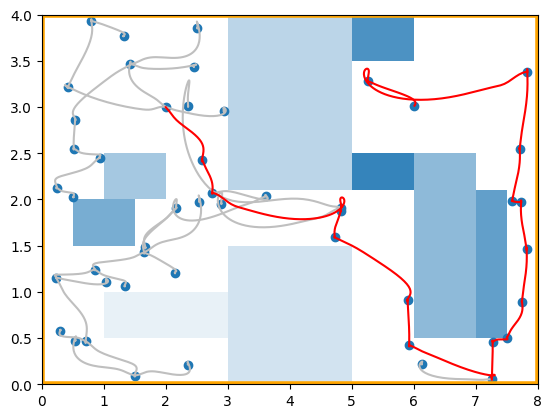

In [7]:
from path_planner_lqrrt import PathPlannerLQRRT
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

from quad_sim_pendulum import simulate_quadrotor

# Need to reload the module to use the latest code
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
obstacles = Obstacles("./configs/world_maze.yaml")

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", obstacles, quadrotor)
planner = rrt.get_planner()
rrt.plot_result(planner)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [3]:
t, x, u = rrt.interpolate_trajectory(planner)
anime = Animation(obstacles, quadrotor)
anime.set_trajectory(x)
anime.animate()

In [4]:
import importlib
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
obstacles = Obstacles("./configs/world.yaml")

from trajectory_optimizer import TrajectoryOptimizer
optim = TrajectoryOptimizer(quadrotor)
x = np.load("./initial_guesses/x.npy")
t = np.load("./initial_guesses/t.npy")
u = np.load("./initial_guesses/u.npy")
print(x.shape, t.shape, u.shape)
init_traj = {"state": x, "input": u}
dt = t[1] - t[0]
x = optim.optimize_trajectory(x0, len(x), dt, obstacles, initial_traj=init_traj)

(127, 8) (127,) (127, 2)


TypeError: must be real number, not pydrake.symbolic.Variable

In [2]:
anime = Animation(obstacles, quadrotor)
anime.set_trajectory(x)
anime.animate()